# MD004 ENTREGA8 NAIVE BAYES & ANÁLISIS DE SENTIMIENTO


###### **Trabajo del Tema 8**

**Descripción de la tarea:**

El csv adjunto incluye reviews que han dejado usuarios en la Google Play Store en referencia a 23 apps, incluyendo una valoración categórica sobre el análisis de sentimiento. Los datos son los siguientes:

- package_name: Nombre de la app
- review: Texto del usuario con la review
- polarity: Sentimiento de polaridad de la review:
    - 1: Review con un sentimiento muy positivo o muy negativo
    - 0: Review con un sentimiento neutro (-->realizo una pequeña corrección, el enunciado ponía '2')

**Se pide:**

1. **Limpieza de instancias (3.5p)**: Limpieza de texto de las instancias. Se valorará el uso de las técnicas empleadas y las explicaciones en el notebook
2. **Creación de modelo clasificador de Naive Bayes (3.5p)**: Se valorará el uso de técnicas empleadas como el split entre entrenamiento y validación y selección de métrica de optimización
3. **Optimización del modelo (2p)**: En base a los resultados obtenidos, ¿Somos capaces de mejorar nuestro modelo? Se valorará el uso de ténicas como Laplace smoothing, uso de 
la variable categórica package_name
4. **Conclusiones y vías abiertas (1p)**: ¿Qué resultados obtenemos en el modelo?, ¿Predice correctamente?, ¿En todas las apps?, ¿Qué datos podrían ayudarnos a mejorar la predicción?

**>> este ejercicio no tiene una solución única<<** Muchas opciones pueden ser válidas, pero se espera que se haga una interpretación de los datos obtenidos en todos los puntos y que se construya un modelo de Naive Bayes acorde a lo analizado (Si la clasificación es válida, por qué lo es y si no llega a serlo, por qué no lo es y cómo podrían mejorarse los resultados)

<font color='red'> **Entrega: fichero Jupyter Notebook con MD004NombreApellidosAC08.ipynb y fichero .pdf con MD004NombreApellidosAC08.pdf** </font>

# Carga de liberias

In [1]:
install.packages('slam')
install.packages('tm')
install.packages('SnowballC')
install.packages('gmodels')
install.packages('wordcloud')
install.packages("e1071")
library(e1071)
library(caret)
library(tm)
library(SnowballC)
library(wordcloud)
library(gmodels)
library(wordcloud)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: ggplot2

Loading required package: lattice

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


Loading required package: RColorBrewer



# Carga de Datos

In [2]:
data_sentiment <- read.csv(file='sentiment_dataset.csv', header=TRUE)
#head(data_sentiment)  # Muestra las primeras 6 observaciones
#tail(data_sentiment)  # Muestra las últimas 6 observaciones


# 1. Exploración del Dataset

In [3]:
str(data_sentiment)

'data.frame':	891 obs. of  3 variables:
 $ package_name: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...
 $ review      : chr  " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen"| __truncated__ " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app a"| __truncated__ " profile any time my wife or anybody has more than one post and i view them it would take me to there profile s"| __truncated__ " the new features suck for those of us who don't have a working back button can you guys make the videos able t"| __truncated__ ...
 $ polarity    : int  0 0 0 0 0 0 0 0 0 0 ...


In [4]:
# Proporción de clases
round(prop.table(table(data_sentiment$polarity))*100, digits = 1)


   0    1 
65.5 34.5 

In [5]:
# Establecemos el tipo de dato a factor
data_sentiment$polarity = factor(data_sentiment$polarity)
data_sentiment$polarity

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
[112] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1
[149] 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1
[186] 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
[260] 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0
[445] 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1
[482] 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0
[519] 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0
[556] 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1
[593] 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1
[630] 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1
[667] 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
[704] 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
[741] 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0
[778] 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1
[815] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[852] 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1
[889] 0 1 1
Levels: 0 1

# 1. Limpieza de instancias (3.5p):

Este paso prepara los datos textuales para las siguientes etapas de limpieza y transformación, como eliminar palabras irrelevantes (stopwords), convertir a minúsculas, eliminar puntuación, etc.

Si tienes más código o necesitas ayuda con los próximos pasos, avísame.

In [6]:
# Función para reemplazar puntuaciones por espacios
replacePunctuation <- function(x) {
  gsub('[[:punct:]]', ' ', x)
}

# Función para eliminar acentos
removeAccents <- function(x) {
  chartr('áéíóúàèìòùâêîôûäëïöüç', 'aeiouaeiouaeiouaeiouac', x)
}

# Función para eliminar URLs
removeURLs <- function(x) {
  gsub("http[s]?://\\S+|www\\.\\S+", "", x)
}

# Función para eliminar correos electrónicos
removeEmails <- function(x) {
  gsub("\\S+@\\S+", "", x)
}

# Función para eliminar palabras cortas
removeShortWords <- function(x) {
  gsub("\\b\\w{1,2}\\b", "", x)
}

# Función para eliminar caracteres no alfanuméricos
removeNonAlphaNumeric <- function(x) {
  gsub("[^a-zA-Z0-9 ]", "", x)
}

# Función para limpiar el corpus
clean_corpus <- function(corpus) {
  data_corpus_clean <- tm_map(corpus, content_transformer(tolower))          # Convertir a minúsculas
  data_corpus_clean <- tm_map(data_corpus_clean, content_transformer(removeURLs))  # Eliminar URLs
  data_corpus_clean <- tm_map(data_corpus_clean, content_transformer(removeEmails)) # Eliminar correos electrónicos
  data_corpus_clean <- tm_map(data_corpus_clean, removeNumbers)             # Eliminar números
  data_corpus_clean <- tm_map(data_corpus_clean, removeWords, stopwords("en")) # Eliminar palabras vacías (en inglés)
  data_corpus_clean <- tm_map(data_corpus_clean, removePunctuation)         # Eliminar puntuación
  data_corpus_clean <- tm_map(data_corpus_clean, content_transformer(replacePunctuation)) # Reemplazar puntuación por espacios
  data_corpus_clean <- tm_map(data_corpus_clean, content_transformer(removeNonAlphaNumeric)) # Eliminar caracteres no alfanuméricos
  data_corpus_clean <- tm_map(data_corpus_clean, content_transformer(removeShortWords)) # Eliminar palabras cortas
  data_corpus_clean <- tm_map(data_corpus_clean, stripWhitespace)           # Eliminar espacios extra
  data_corpus_clean <- tm_map(data_corpus_clean, removeWords, c('app', 'apps', 'the', 'and', 'of')) # Palabras específicas
  data_corpus_clean <- tm_map(data_corpus_clean, stemDocument, language = "english") # Stemming en inglés
  data_corpus_clean <- tm_map(data_corpus_clean, PlainTextDocument)         # Convertir a texto plano
  data_corpus_clean <- tm_map(data_corpus_clean, content_transformer(removeAccents)) # Eliminar acentos
  return(data_corpus_clean)
}


In [7]:
# Crear un corpus a partir de la columna 'review'
data_corpus <- VCorpus(VectorSource(data_sentiment$review), readerControl = list(language = 'en'))


In [8]:
# Limpiar el corpus usando la función definida
data_corpus_clean <- clean_corpus(data_corpus)

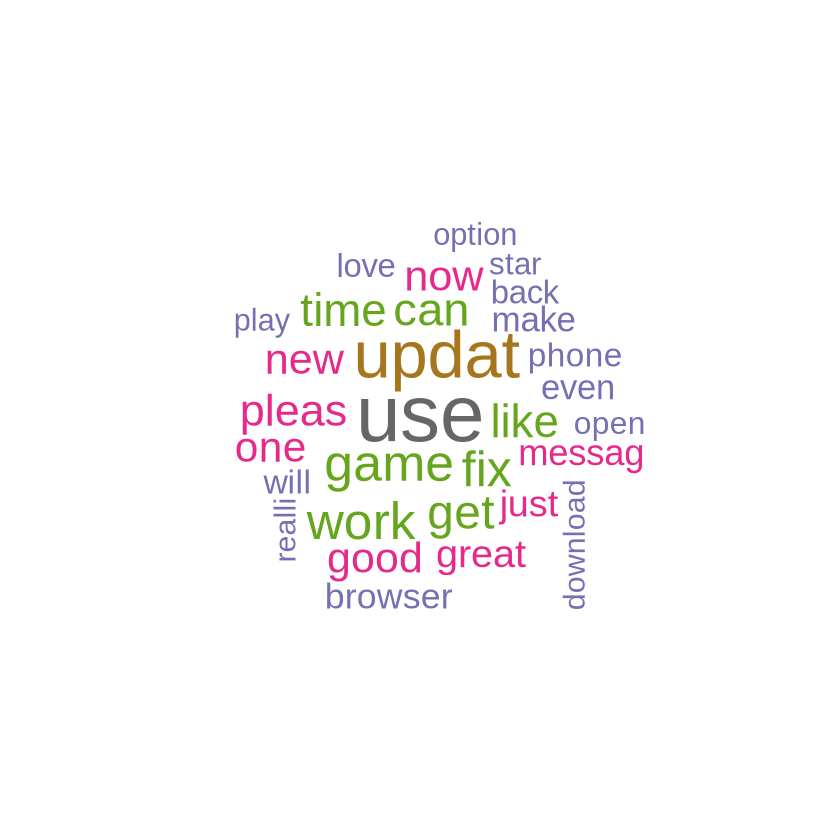

In [9]:
wordcloud(data_corpus_clean, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

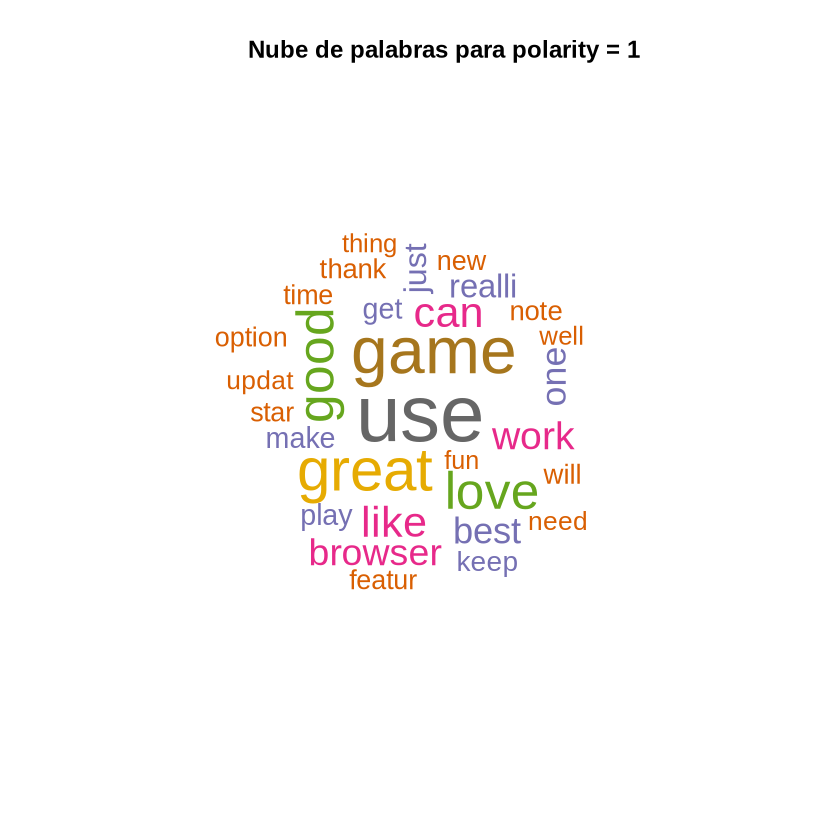

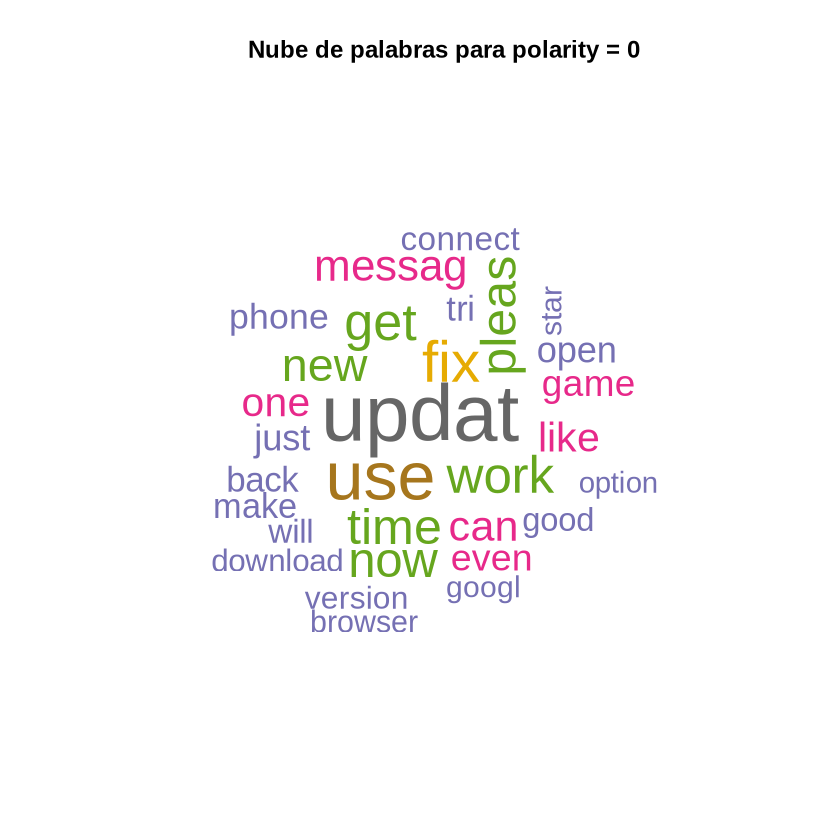

In [10]:
# Filtrar reviews con polarity = 1
data_sentiment_positive <- subset(data_sentiment, data_sentiment$polarity == 1)
data_corpus_positive <- VCorpus(VectorSource(data_sentiment_positive$review), readerControl = list(language = 'en'))
data_corpus_clean_positive <- clean_corpus(data_corpus_positive)

# Filtrar reviews con polarity = 0
data_sentiment_negative <- subset(data_sentiment, data_sentiment$polarity == 0)
data_corpus_negative <- VCorpus(VectorSource(data_sentiment_negative$review), readerControl = list(language = 'en'))
data_corpus_clean_negative <- clean_corpus(data_corpus_negative)

# Generar nube de palabras para polarity = 1
wordcloud(data_corpus_clean_positive, 
          max.words = 30, 
          random.order = FALSE, 
          colors = brewer.pal(name = "Dark2", n = 8))
title("Nube de palabras para polarity = 1")

# Generar nube de palabras para polarity = 0
wordcloud(data_corpus_clean_negative, 
          max.words = 30, 
          random.order = FALSE, 
          colors = brewer.pal(name = "Dark2", n = 8))
title("Nube de palabras para polarity = 0")


In [11]:
# Polaridad 0 (neutras)
data_sentiment_neutral = subset(data_sentiment, data_sentiment$polarity == 0)

# Polaridad 1 (extremas)
data_sentiment_extreme = subset(data_sentiment, data_sentiment$polarity == 1)

# 2. Creación de modelo clasificador de Naive Bayes (3.5p)

## 2.1 Configuración del Dataset

In [12]:
dtm = DocumentTermMatrix(data_corpus_clean)
dtm

<<DocumentTermMatrix (documents: 891, terms: 2745)>>
Non-/sparse entries: 16261/2429534
Sparsity           : 99%
Maximal term length: 24
Weighting          : term frequency (tf)

In [13]:
#str(dtm)

In [14]:
#as.matrix(dtm)

In [15]:
#Establecemos las frecuencias de cada término sumando las columnas 
termFreq = colSums(as.matrix(dtm))
#head(termFreq)

In [16]:
#Creamos el nuevo data set
tabla_frec = data.frame(term = names(termFreq), freq = termFreq)
#head(tabla_frec)

In [17]:
#Ordenamos por frecuencias descendientes
tabla_frec = tabla_frec[order(-tabla_frec[,2]),]
head(tabla_frec)

,term,freq
,<chr>,<dbl>
use,use,300
updat,updat,244
game,game,179
work,work,177
fix,fix,171
get,get,162


## 2.2. División del dataset

In [18]:
set.seed(555)

# Creamos el data partition de la función caret con un 70 - 30 split
inTrain <- createDataPartition(y = data_sentiment$polarity
                                  , p = .70
                                  , list = FALSE
                                  , times = 1)
# Definitmos los datasets originales entre train y test
data.train<-data_sentiment[inTrain,]
data.test<-data_sentiment[-inTrain,]
# Resumen estadístico de las variables
summary(data.train)
summary(data.test)

 package_name          review          polarity
 Length:624         Length:624         0:409   
 Class :character   Class :character   1:215   
 Mode  :character   Mode  :character           

 package_name          review          polarity
 Length:267         Length:267         0:175   
 Class :character   Class :character   1: 92   
 Mode  :character   Mode  :character           

In [19]:
# Separamos el corpus según la clase
corpus.train = data_corpus_clean[inTrain]
corpus.test  = data_corpus_clean[-inTrain]

# Y finalmente el Document term matrix
dtm.train = dtm[inTrain, ]
dtm.test  = dtm[-inTrain, ]

# Comprobamos que el desbalanceo de clases es el adecuado
print("Training")
round(prop.table(table(data.train$polarity))*100, 2)
print("Test")
round(prop.table(table(data.test$polarity))*100, 2)

[1] "Training"



    0     1 
65.54 34.46 

[1] "Test"



    0     1 
65.54 34.46 

In [20]:
#Encontramos todas las palabras que se repiten más de 3 veces
freq_terms = findFreqTerms(dtm.train, 3)
freq_terms

[1] "aap"        "abil"       "abl"        "absolut"    "access"    
  [6] "account"    "achiev"     "action"     "activ"      "actual"    
 [11] "add"        "addict"     "addit"      "address"    "adjust"    
 [16] "advertis"   "age"        "ago"        "agre"       "album"     
 [21] "allow"      "almost"     "along"      "alreadi"    "also"      
 [26] "although"   "alway"      "amaz"       "among"      "amount"    
 [31] "android"    "angri"      "anim"       "annoy"      "anoth"     
 [36] "answer"     "anymor"     "anyon"      "anyth"      "anytim"    
 [41] "appear"     "appl"       "appli"      "applic"     "around"    
 [46] "asap"       "ask"        "attack"     "audio"      "auto"      
 [51] "automat"    "avail"      "away"       "awesom"     "awsom"     
 [56] "back"       "background" "backup"     "bad"        "bait"      
 [61] "bar"        "base"       "basic"      "batteri"    "becom"     
 [66] "begin"      "best"       "better"     "big"        "bigger"    
 [71] "bird"       "bit"        "block"      "bomb"       "book"      
 [76] "bookmark"   "boost"      "booster"    "bore"       "bottom"    
 [81] "bought"     "box"        "break"      "brilliant"  "broke"     
 [86] "broken"     "brows"      "browser"    "bug"        "build"     
 [91] "busi"       "button"     "buy"        "cach"       "call"      
 [96] "can"        "candi"      "cant"       "cap"        "capit"     
[101] "card"       "care"       "carousel"   "caus"       "cell"      
[106] "certain"    "challeng"   "chanc"      "chang"      "channel"   
[111] "chat"       "cheap"      "check"      "chines"     "choic"     
[116] "choos"      "chrome"     "clan"       "clash"      "classic"   
[121] "clear"      "click"      "client"     "clip"       "close"     
[126] "cloud"      "clutter"    "coc"        "code"       "color"     
[131] "colour"     "come"       "comment"    "communic"   "compani"   
[136] "compar"     "compat"     "compet"     "complain"   "complaint" 
[141] "complet"    "comput"     "con"        "concern"    "confus"    
[146] "connect"    "consid"     "constant"   "contact"    "continu"   
[151] "control"    "convers"    "cool"       "copi"       "corner"    
[156] "correct"    "coupl"      "coz"        "cpu"        "crap"      
[161] "crash"      "crazi"      "creat"      "crush"      "current"   
[166] "custom"     "daili"      "data"       "date"       "day"       
[171] "dead"       "dear"       "decemb"     "decid"      "decreas"   
[176] "default"    "definit"    "delay"      "delet"      "design"    
[181] "desir"      "desktop"    "detail"     "detect"     "dev"       
[186] "develop"    "devic"      "dial"       "differ"     "difficult" 
[191] "direct"     "dis"        "disabl"     "disappear"  "disappoint"
[196] "display"    "document"   "doesnt"     "done"       "dont"      
[201] "doubt"      "download"   "drain"      "drive"      "drop"      
[206] "dropbox"    "due"        "dumb"       "dwnldng"    "easi"      
[211] "easier"     "easili"     "edit"       "either"     "ekantipur" 
[216] "els"        "email"      "emoji"      "emot"       "enabl"     
[221] "end"        "endors"     "engin"      "english"    "enjoy"     
[226] "enough"     "enter"      "entertain"  "entir"      "epap"      
[231] "episod"     "error"      "especi"     "essenti"    "etc"       
[236] "even"       "ever"       "everi"      "evernot"    "everyon"   
[241] "everyth"    "everytim"   "exact"      "excel"      "except"    
[246] "excus"      "exit"       "expect"     "expens"     "experi"    
[251] "extra"      "extrem"     "face"       "facebook"   "fact"      
[256] "fail"       "famili"     "fan"        "fantast"    "far"       
[261] "farm"       "fast"       "faster"     "fastest"    "favorit"   
[266] "featur"     "feed"       "feel"       "figur"      "file"      
[271] "fill"       "final"      "find"       "fine"       "finish"    
[276] "firefox"    "first"      "five"       "fix"        "folder"    
[281] "follow"     "font" 

In [21]:
#Recortamos el data set con las palabras con una frecuencia superior a 3
freq_terms = findFreqTerms(dtm.train, 3)
reduced_dtm.train = DocumentTermMatrix(corpus.train, list(dictionary=freq_terms))
reduced_dtm.test =  DocumentTermMatrix(corpus.test, list(dictionary=freq_terms))

#Revisamos cuantas columnas reducimos
ncol(dtm.train)
ncol(reduced_dtm.train)
ncol(dtm.test)
ncol(reduced_dtm.test)

[1] 2745

[1] 850

[1] 2745

[1] 850

## 2.3. Creación de modelo clasificador de Naive Bayes (3.5p)

In [22]:
convert_counts = function(x) {
  x = ifelse(x > 0, 1, 0)
  x = factor(x, levels = c(0, 1), labels=c("No", "Yes"))
  return (x)
}

# apply() allows us to work either with rows or columns of a matrix.
# MARGIN = 1 is for rows, and 2 for columns
reduced_dtm.train = apply(reduced_dtm.train, MARGIN=2, convert_counts)
reduced_dtm.test  = apply(reduced_dtm.test, MARGIN=2, convert_counts)

In [23]:
# store our model in sms_classifier
sentiment_classifier = naiveBayes(reduced_dtm.train # Dataset de entrenamiento
                            , data.train$polarity) # Target de entrenamiento

sentiment_test.predicted = predict(sentiment_classifier,  # Predicciones utilizando el modelo creado con los datos de entrenamiento
                             reduced_dtm.test) # Generación de predicciones para el dataset de test


In [24]:
# Ahora sacamos el confusion matrix
confusionMatrix(sentiment_test.predicted, data.test$polarity)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 148  21
         1  27  71
                                          
               Accuracy : 0.8202          
                 95% CI : (0.7688, 0.8644)
    No Information Rate : 0.6554          
    P-Value [Acc > NIR] : 1.822e-09       
                                          
                  Kappa : 0.608           
                                          
 Mcnemar's Test P-Value : 0.4705          
                                          
            Sensitivity : 0.8457          
            Specificity : 0.7717          
         Pos Pred Value : 0.8757          
         Neg Pred Value : 0.7245          
             Prevalence : 0.6554          
         Detection Rate : 0.5543          
   Detection Prevalence : 0.6330          
      Balanced Accuracy : 0.8087          
                                          
       'Positive' Class : 0               
                              

In [25]:
# Visualizamos las instancias que han sido filtradas erróneamente
#data.test[(sentiment_test.predicted != data.test$polarity) # Seleccionamos las instancias con error en la predicción
#          & (data.test$polarity == '1'),] # Seleccionamos las instancias con etiqueta ham

In [26]:
# Visualizamos las instancias que han pasado el filtro de 1 pero que deberían haver sido filtradas
#data.test[(sentiment_test.predicted != data.test$polarity) # Seleccionamos las instancias con error en la predicción
#          & (data.test$polarity == '1'),] # Seleccionamos las instancias con etiqueta spam

# 3. Optimización del modelo (2p)

## 3.1 Laplace Smoothing

In [27]:
# Inicializar variables para almacenar el mejor modelo y su rendimiento
best_model <- NULL
best_laplace <- NULL
best_accuracy <- 0  # Variable para rastrear la mejor precisión
best_conf_matrix <- NULL  # Variable para almacenar la matriz de confusión del mejor modelo

# Iteración para optimizar el modelo con Laplace smoothing
for (i in 1:10) {
  laplace_value <- (i - 1) / 4  # Definir el valor de Laplace
  
  # Entrenar el modelo Naive Bayes con Laplace smoothing
  sms_classifier2 <- naiveBayes(reduced_dtm.train, 
                                data.train$polarity, 
                                laplace = laplace_value)
  
  # Predecir en el conjunto de prueba
  sms_test.predicted2 <- predict(sms_classifier2, reduced_dtm.test)
  
  # Calcular la matriz de confusión
  conf_matrix <- confusionMatrix(sms_test.predicted2, data.test$polarity)
  
  # Extraer precisión del modelo
  accuracy <- conf_matrix$overall["Accuracy"]
  
  # Verificar si este modelo es el mejor
  if (accuracy > best_accuracy) {
    best_accuracy <- accuracy
    best_model <- sms_classifier2
    best_laplace <- laplace_value
    best_conf_matrix <- conf_matrix  # Guardar la matriz de confusión del mejor modelo
  }
}

# Imprimir la información completa del mejor modelo
print(paste0("Mejor modelo con Laplace = ", best_laplace, " y Accuracy = ", best_accuracy))
print(best_conf_matrix)  # Imprimir la matriz de confusión completa del mejor modelo


[1] "Mejor modelo con Laplace = 0 y Accuracy = 0.820224719101124"
Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 148  21
         1  27  71
                                          
               Accuracy : 0.8202          
                 95% CI : (0.7688, 0.8644)
    No Information Rate : 0.6554          
    P-Value [Acc > NIR] : 1.822e-09       
                                          
                  Kappa : 0.608           
                                          
 Mcnemar's Test P-Value : 0.4705          
                                          
            Sensitivity : 0.8457          
            Specificity : 0.7717          
         Pos Pred Value : 0.8757          
         Neg Pred Value : 0.7245          
             Prevalence : 0.6554          
         Detection Rate : 0.5543          
   Detection Prevalence : 0.6330          
      Balanced Accuracy : 0.8087          
                                          
       

## 3.2 Laplace Smoothing con package_name como factor

In [28]:
# Inicializar variables para almacenar el mejor modelo y su rendimiento
best_model <- NULL
best_laplace <- NULL
best_accuracy <- 0  # Variable para rastrear la mejor precisión
best_conf_matrix <- NULL  # Variable para almacenar la matriz de confusión del mejor modelo

# Convertir la columna package_name en un factor
data.train$package_name <- as.factor(data.train$package_name)
data.test$package_name <- as.factor(data.test$package_name)

# Crear una matriz de términos para package_name y combinarla con la matriz de términos existente
package_dtm.train <- model.matrix(~ package_name - 1, data = data.train)  # Crear matriz para entrenamiento
package_dtm.test <- model.matrix(~ package_name - 1, data = data.test)    # Crear matriz para test

# Combinar la matriz de términos original con la matriz de package_name
combined_dtm.train <- cbind(as.matrix(reduced_dtm.train), package_dtm.train)
combined_dtm.test <- cbind(as.matrix(reduced_dtm.test), package_dtm.test)

# Aplicar la optimización del modelo con Laplace Smoothing
for (i in 1:10) {
  laplace_value <- (i - 1) / 4  # Definir el valor de Laplace
  
  # Entrenar el modelo Naive Bayes con Laplace smoothing
  sms_classifier2 <- naiveBayes(combined_dtm.train, 
                                data.train$polarity, 
                                laplace = laplace_value)
  
  # Predecir en el conjunto de prueba
  sms_test.predicted2 <- predict(sms_classifier2, combined_dtm.test)
  
  # Calcular la matriz de confusión
  conf_matrix <- confusionMatrix(sms_test.predicted2, data.test$polarity)
  
  # Extraer precisión del modelo
  accuracy <- conf_matrix$overall["Accuracy"]
  
  # Verificar si este modelo es el mejor
  if (accuracy > best_accuracy) {
    best_accuracy <- accuracy
    best_model <- sms_classifier2
    best_laplace <- laplace_value
    best_conf_matrix <- conf_matrix  # Guardar la matriz de confusión del mejor modelo
  }
}

# Imprimir la información completa del mejor modelo
print(paste0("Mejor modelo con Laplace = ", best_laplace, " y Accuracy = ", best_accuracy))
print(best_conf_matrix)  # Imprimir la matriz de confusión completa del mejor modelo

[1] "Mejor modelo con Laplace = 0 y Accuracy = 0.835205992509363"
Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 149  18
         1  26  74
                                          
               Accuracy : 0.8352          
                 95% CI : (0.7852, 0.8776)
    No Information Rate : 0.6554          
    P-Value [Acc > NIR] : 4.334e-11       
                                          
                  Kappa : 0.6425          
                                          
 Mcnemar's Test P-Value : 0.2913          
                                          
            Sensitivity : 0.8514          
            Specificity : 0.8043          
         Pos Pred Value : 0.8922          
         Neg Pred Value : 0.7400          
             Prevalence : 0.6554          
         Detection Rate : 0.5581          
   Detection Prevalence : 0.6255          
      Balanced Accuracy : 0.8279          
                                          
       

## 3.3 Transformación TF-IDF (Term Frequency-Inverse Document Frequency)

In [29]:
# Crear la matriz de términos desde el corpus limpio
dtm <- DocumentTermMatrix(data_corpus_clean)

# Transformar la matriz en pesos TF-IDF
dtm_tfidf <- weightTfIdf(dtm)

# Dividir los datos en entrenamiento y prueba
set.seed(123)
train_indices <- sample(1:nrow(as.matrix(dtm_tfidf)), size = 0.8 * nrow(as.matrix(dtm_tfidf)))
train_data <- as.data.frame(as.matrix(dtm_tfidf[train_indices, ]))
test_data <- as.data.frame(as.matrix(dtm_tfidf[-train_indices, ]))

# Agregar la variable objetivo `polarity`
train_data$polarity <- as.factor(data_sentiment$polarity[train_indices])
test_data$polarity <- as.factor(data_sentiment$polarity[-train_indices])

# Entrenar el modelo Naive Bayes
sms_classifier <- naiveBayes(train_data[, -ncol(train_data)], 
                             train_data$polarity, 
                             laplace = 1)

# Predecir y evaluar
sms_test.predicted <- predict(sms_classifier, test_data[, -ncol(test_data)])
conf_matrix <- confusionMatrix(sms_test.predicted, test_data$polarity)
print(conf_matrix)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0   0   0
         1 121  58
                                          
               Accuracy : 0.324           
                 95% CI : (0.2561, 0.3979)
    No Information Rate : 0.676           
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.000           
            Specificity : 1.000           
         Pos Pred Value :   NaN           
         Neg Pred Value : 0.324           
             Prevalence : 0.676           
         Detection Rate : 0.000           
   Detection Prevalence : 0.000           
      Balanced Accuracy : 0.500           
                                          
       'Positive' Class : 0               
                              

## 3.4 Balanceo de Clases 

In [30]:
# Crear la matriz de términos desde el corpus limpio
dtm <- DocumentTermMatrix(data_corpus_clean)
dtm_df <- as.data.frame(as.matrix(dtm))

# Agregar la variable objetivo
dtm_df$polarity <- as.factor(data_sentiment$polarity)

# Aplicar sobremuestreo
balanced_data <- upSample(x = dtm_df[, -ncol(dtm_df)], y = dtm_df$polarity)
balanced_data <- cbind(balanced_data[, -ncol(balanced_data)], polarity = balanced_data$Class)

# Dividir en entrenamiento y prueba
set.seed(123)
train_indices <- sample(1:nrow(balanced_data), size = 0.8 * nrow(balanced_data))
train_data <- balanced_data[train_indices, ]
test_data <- balanced_data[-train_indices, ]

# Entrenar el modelo Naive Bayes
sms_classifier <- naiveBayes(train_data[, -ncol(train_data)], 
                             train_data$polarity, 
                             laplace = 1)

# Predecir y evaluar
sms_test.predicted <- predict(sms_classifier, test_data[, -ncol(test_data)])
conf_matrix <- confusionMatrix(sms_test.predicted, test_data$polarity)
print(conf_matrix)



Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0   0   1
         1 116 117
                                          
               Accuracy : 0.5             
                 95% CI : (0.4342, 0.5658)
    No Information Rate : 0.5043          
    P-Value [Acc > NIR] : 0.5778          
                                          
                  Kappa : -0.0085         
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.000000        
            Specificity : 0.991525        
         Pos Pred Value : 0.000000        
         Neg Pred Value : 0.502146        
             Prevalence : 0.495726        
         Detection Rate : 0.000000        
   Detection Prevalence : 0.004274        
      Balanced Accuracy : 0.495763        
                                          
       'Positive' Class : 0               
                              

# 4. Conclusiones y vías abiertas (1p):

En el análisis se evaluaron cuatro enfoques diferentes para el modelo de clasificación:

**Modelo con Laplace Smoothing:** Este modelo optimizó el parámetro Laplace sin incluir variables adicionales. Logró una precisión (accuracy) de 82.02%, con un buen equilibrio entre sensibilidad (84.57%) y especificidad (77.17%).

**Modelo con Laplace Smoothing + package_name:** Este modelo incluyó la variable package_name como factor adicional en la matriz de términos. Fue el mejor enfoque, alcanzando una precisión de 83.52%, junto con una sensibilidad de 85.14% y una especificidad de 80.43%. La inclusión de package_name proporcionó información adicional que ayudó a mejorar la capacidad del modelo para diferenciar entre reviews positivas y negativas.

**Modelo con TF-IDF:** Transformó las reviews en una representación ponderada por frecuencia inversa de documentos. Este enfoque resultó ineficaz, con una precisión de solo 32.4% y una sensibilidad de 0%, lo que indica que no identificó casos positivos.

**Modelo con Balanceo de Clases:** Utilizó sobremuestreo para equilibrar las clases desbalanceadas. Sin embargo, este método no mejoró el rendimiento, alcanzando una precisión de 50%, equivalente a predicciones aleatorias, y nuevamente con una sensibilidad de 0%.

En conclusión, el modelo que combinó Laplace Smoothing con package_name demostró ser el más efectivo. Aunque los resultados son positivos, futuras mejoras podrían incluir la exploración de técnicas como Word Embeddings, SVM o redes neuronales, además de considerar nuevas variables como la categoría de la app, el número de descargas o las calificaciones promedio.